<a href="https://colab.research.google.com/github/ramsurya98/Introduction-Network-Science-2021/blob/main/Exercise01/NetworksExercise_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Network Science SS 2020</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computer Exercise 1</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Python</h1>
<hr>

**Website:** http://www.thp.uni-koeln.de/witthaut/group.html


**Submission:** Please upload your solutions to Ilias.

## Networks Package
To study and visualise networks, the python community developed networkX. It is generally the simplest python tool to create, plot, and study any type of graph. If you have used Anaconda to install your python, networkx should be included already, so you should be able to directly use it. If not, you need to `pip install networkx`

The aim of this exercise is to get a feeling for working with the network packages. At the end of this exercise you will be able to compute the Laplacian matrix and the shortest-path distance in arbitrary graphs.

## 1.Random Graphs
An undirected simple graph is a pair $G(V,E)$, where $V$ is a set of $n$ vertices (or nodes) and $E$ is a set of $m$ edges. In a directed graph the edges $E$ are oriented.

Using `networkx`: Write a function that creates an undirected simple graph with $N$ nodes which are randomly connected by $M$ edges (no self-edges). Repeat for a directed graph. What is the maximal amount of edges $M$ in both types of graphs?

For further guidance, you can find the `networkx` tutorial here: https://networkx.github.io/documentation/latest/tutorial.html


Please enter the number of vertices 


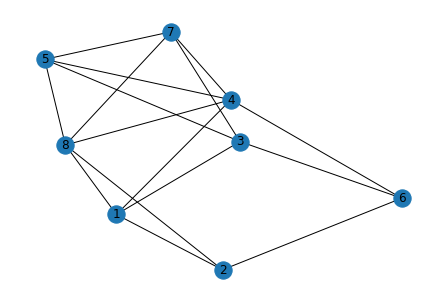

In [26]:
# Import NetworkX 
import networkx as nx

# import numpy to generate random numbers
import numpy as np
np.random.seed(100)

def random_graph(N, M):
    G = nx.Graph() # Creates an empty simple graph 
    
    #Check N and M for consistency. Think about a termination condition. 
    maxedges = N*(N-1)/2
    if M > maxedges:
      return "M value is more than the maximum allowed edges"
    
    # Here are a list of functions that might help:
    # Add a node, numbered 1: G.add_node(1)
    # Add a list of nodes: G.add_nodes_from([1,2,3])
    # Add an edge between two nodes numbered 1 and 2: G.add_edge(1,2)
    # Add a list of edges: G.add_edges_from([(1,2), ...])
    node_list = range(1, N+1)
    G.add_nodes_from(node_list)        
    
    while G.number_of_edges() <= M-1: 
        # Iterate until graph G has M edges. number_of_edges() is a list that gives the number of edges in G.
        # Add random edges while the total number of edges is smaller than M.
        
        edge_list  = [(np.random.choice(node_list), np.random.choice(node_list))]
        G.add_edges_from(edge_list)
        
        # Do not allow self-edges!
        G.remove_edges_from(nx.selfloop_edges(G))

    
    return G
    
    
def random_di_graph(N, M):
    G = nx.DiGraph()
    
    # Same idea as above, but for a directed graph.
    # Check N and M for consistency. Think about a termination condition. It is different to the one above.
    max_edges = N*(N-1)
    if M > max_edges:
      return "M value is more than the maximum allowed edges" 

    node_list = range(1, N+1)
    G.add_nodes_from(edge_list)

    # Add random edges while the total number of edges is smaller than M.
    while G.number_of_edges() <= M-1:
      edge_list  = [(np.random.choice(node_list), np.random.choice(node_list))]
      G.add_edges_from(edge_list)
      G.remove_edges_from(nx.selfloop_edges(G))

    return G


# You can call you functions with 
print()
print("Please enter the number of vertices ")
G = random_graph(8, 16)

# You can plot you graphs by using
nx.draw(G, with_labels=True)

Don't forge to add a condition to each function that should answer: *What is the maximal amount of edges 𝑀 in both types of graphs?*

## 2. Adjacency, Degree and Laplacian Matrix
The adjacency matrix $A$, the degree matrix $D$ and the Laplacian matrix $L$ are defined as
$$ \begin{align} 
    \mathbf{D}_{ij} &= 
    \begin{cases}
        \text{deg}(v_i) & i = j \\
        0 & \, \text{else}
    \end{cases}\\
    \mathbf{A}_{ij} &= 
    \begin{cases}
        1 & (i,j) \in \text{edge}\\
        0 & \, \text{else}
    \end{cases}\\
    \mathbf{L}_{ij} &= \mathbf{D}_{ij} - \mathbf{A}_{ij} = 
    \begin{cases}
        \text{deg}(v_i) & i = j \\
        -1 & (i,j) \in \text{edge} \\
        0 & \, \text{else}
    \end{cases}
\end{align} $$
Write a function that computes $A$, $D$, and $L$. Be extra careful of the degree and the adjacency matrix when switching from simple to directed graph. Why are the adjacency and the laplacian matrix not symmetric for directed graphs?

There exist pre-written functions for these matrices. Compare.

The Adjaceny Matrix is [[0. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]
The Degree Matrix is [[4. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 4.]]
The Laplacian matrix is [[ 4. -1. -1. -1. -1.]
 [-1.  3.  0. -1. -1.]
 [-1.  0.  3. -1. -1.]
 [-1. -1. -1.  4. -1.]
 [-1. -1. -1. -1.  4.]]


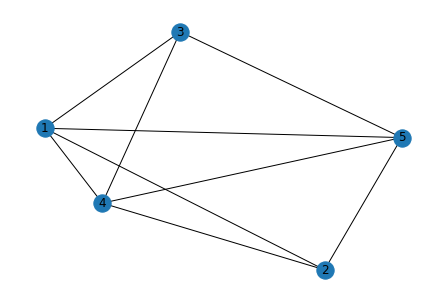

In [27]:
def my_adjacency_matrix(G):
    A = np.zeros([G.number_of_nodes(), G.number_of_nodes()]) # Create a matrix of zeros. 
    
    # Fill the adjacency matrix with ones at the correct position.
    # The command G.has_edge(i, j) which checks if graph g has an edge (i,j), may be useful here.
    for i in range(G.number_of_nodes()):
      for j in range(G.number_of_nodes()):

        if G.has_edge(i+1, j+1):
          A[i, j] = 1

        else:
          A[i,j] = 0

    return A


def my_degree_matrix(G):
    D = np.zeros([G.number_of_nodes(), G.number_of_nodes()]) # Create a matrix of zeros. 
    
    # Fill degree matrix. G.degree(i), which gives the degree of node i, may be useful here.
    for i in range(G.number_of_nodes()):
      D[i, i] = G.degree(i+1)
 
    
    return D


def my_laplacian_matrix(G):
    L = np.zeros([G.number_of_nodes(), G.number_of_nodes()])
    A = my_adjacency_matrix(G)
    D = my_degree_matrix(G)
    
    # Create L.
    for i in range(G.number_of_nodes()):
      for j in range(G.number_of_nodes()):
        L[i,j] = D[i, j] - A[i, j]
    
    return L

G = random_graph(5, 9)

nx.draw(G, with_labels=True)

print("The Adjaceny Matrix is", my_adjacency_matrix(G))
print("The Degree Matrix is", my_degree_matrix(G))
print("The Laplacian matrix is", my_laplacian_matrix(G))

## 3. Breadth-first search

Breadth-first search (BFS) is an algorithm to search through a graph $G$. After choosing one starting node $V$, the algorithm travereses the graph until it finished the whole graph or until it finds a selected termination node. With this algorithm it is possible to build a shortest-path tree of graph $G$. A shortest-path tree is a spanning tree $T$ of $G$ (a graph with no loops) rooted a vertex $V$, such that the path distance from $V$ to any other node $U$ is the shortest-path distance from $V$ to $U$.

Implement BFS for the random graph you built in exercise 1, s.t. you can output its shortest-path tree. What problems occur if you would implement (you don't have to do that) BFS for weighted graphs?

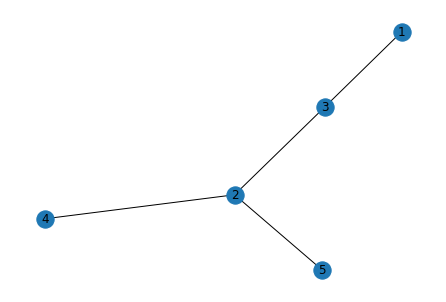

In [49]:
def BFS(G, start_node):
    # G is the graph you are studying and start_node is the starting node
    
    queue = [start_node]   # Initialise queue.
    visited = [start_node]   # Initialise which vertices were visited.
    
    shortest_path_tree = nx.Graph()   # This will be our shortest path tree.
    
    shortest_path_tree.add_nodes_from(G.nodes)   # We copy only the nodes, not the edges
    
    while len(queue) > 0:   # Iterate through queue until there is no node left.
        # Iterate through neighbors of first queue entry.
        a = queue.pop(0)
        for i in list(G[a]):
          if i not in visited:
            queue.append(i)
            visited.append(i)
            shortest_path_tree.add_edge(a, i)


             
        

            # Check if neighbour was already visited. If not:
                # Add neighbour to queue.
                # Add neighbour to visited.
                # Add corresponding edge to shortest_path_tree. Use add_edge!(g, i,j).

        
        # Delete first queue entry. use pop(0) for example.

    return shortest_path_tree

# You can plot you graphs by using
G = random_graph(5, 9)
#nx.draw(G, with_labels=True)
H = BFS(G,2)
nx.draw(H, with_labels=True)

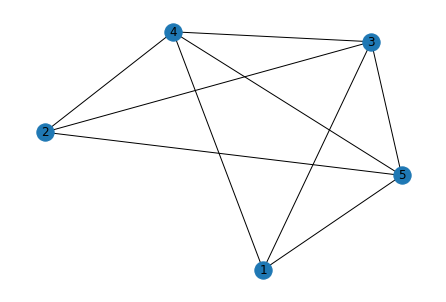

In [50]:
nx.draw(G, with_labels = True)